<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [22.7 Advanced-Topics](chapter22.07-Advanced-Topics.ipynb) | [Contents](Index.ipynb) | [CHAPTER 23. Ordinary Differential Equations: Boundary-Value Problems](chapter23.00-ODE-Boundary-Value-Problems.ipynb) >

## Euler Method

This seems to be the simplest method of the following:

Suppose that $\vec{S}(t)$ s.t. that 

$\vec{S}{t}=()\begin{pmatrix} y(t) \\ y'(t) \\ \vdots \\ y^{n-1}(t) \\ y^{n}(t) \end{pmatrix}$

where $y^i(t)$ is the $i$th order derivative of y

Any ODE of order $n$ may be written in the form:

$\frac{d\vec{S}(t)}{dt}=F(t,\vec{S}(t))$

Writing this out in infinitesimals, we get:

$\vec{S}(t+dt)=\vec{S}(t)+dt*F(\vec{S}(t),t)$

If we discretise this we get with some finite $\delta t$

$\vec{S}(t_{j+1}) \approx \vec{S}(t_{j})+dt*F(\vec{S}(t_j),t_j)$

Try: 

$\frac{df(t)}{dt}=e^{-t}$ with initial condition $f(0)=-1$

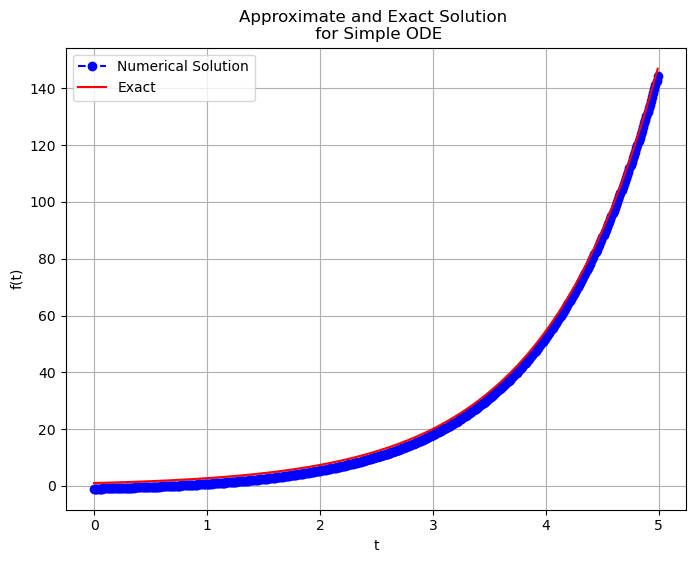

In [11]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda t: np.exp(t)
dt = 0.01
ti = 0
tf = 5
t = np.arange(0,tf,dt)
s0 = -1

s = np.zeros(len(t))
s[0] = s0

for i in range(len(t)-1):
    s[i+1] = s[i] + dt*(f(t[i]))

fig = plt.figure(figsize=(8,6))
plt.plot(t,s,'bo--',label='Numerical Solution')
plt.plot(t,f(t),'r',label='Exact')
plt.title('Approximate and Exact Solution \n for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend()

In [31]:
def Euler_Method_Checker_Explicit(f,exact,ti,tf,dt,f0):
    #Inputs:
        #f = function of t to be differentiated
        #exact = symbolic solution of f
        #ti = start point of t
        #tf = end point of t
        #dt = finite steps between adjacent t values in grid
        #f0 = initial condition
    
    import numpy as np
    import matplotlib.pyplot as plt

    t = np.arange(0,tf,dt)

    s = np.zeros(len(t))
    s[0] = f0

    for i in range(len(t)-1):
        s[i+1] = s[i] + dt*(f(t[i]))

    fig = plt.figure(figsize=(8,6))
    plt.plot(t,s,'bo--',label='Numerical Solution')
    plt.plot(t,exact(t),'r',label='Exact')
    plt.title("Approximate and Exact Solution \n for Simple ODE using \n Euler's Explicit method")
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend()
    
def Euler_Method_Checker_Implicit(f,exact,ti,tf,dt,f0):
    #Inputs:
        #f = function of t to be differentiated
        #exact = symbolic solution of f
        #ti = start point of t
        #tf = end point of t
        #dt = finite steps between adjacent t values in grid
        #f0 = initial condition
    
    import numpy as np
    import matplotlib.pyplot as plt

    t = np.arange(0,tf,dt)

    s = np.zeros(len(t))
    s[0] = f0

    for i in range(len(t)-1):
        s[i+1] = s[i] + dt*(f(t[i+1]))

    fig = plt.figure(figsize=(8,6))
    plt.plot(t,s,'bo--',label='Numerical Solution')
    plt.plot(t,exact(t),'r',label='Exact')
    plt.title("Approximate and Exact Solution \n for Simple ODE using \n Euler's Implicit method")
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend()
    
def Euler_Method_Checker_Trap(f,exact,ti,tf,dt,f0):
    #Inputs:
        #f = function of t to be differentiated
        #exact = symbolic solution of f
        #ti = start point of t
        #tf = end point of t
        #dt = finite steps between adjacent t values in grid
        #f0 = initial condition
    
    import numpy as np
    import matplotlib.pyplot as plt

    t = np.arange(0,tf,dt)

    s = np.zeros(len(t))
    s[0] = f0

    for i in range(len(t)-1):
        s[i+1] = s[i] + dt/2*(f(t[i+1])+f(t[i]))

    fig = plt.figure(figsize=(8,6))
    plt.plot(t,s,'bo--',label='Numerical Solution')
    plt.plot(t,exact(t),'r',label='Exact')
    plt.title("Approximate and Exact Solution \n for Simple ODE using \n Euler's Trapezoidal method")
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend()

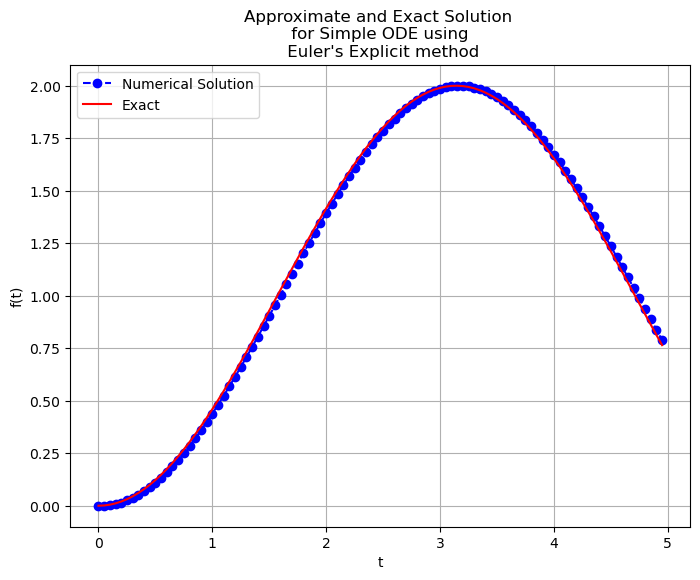

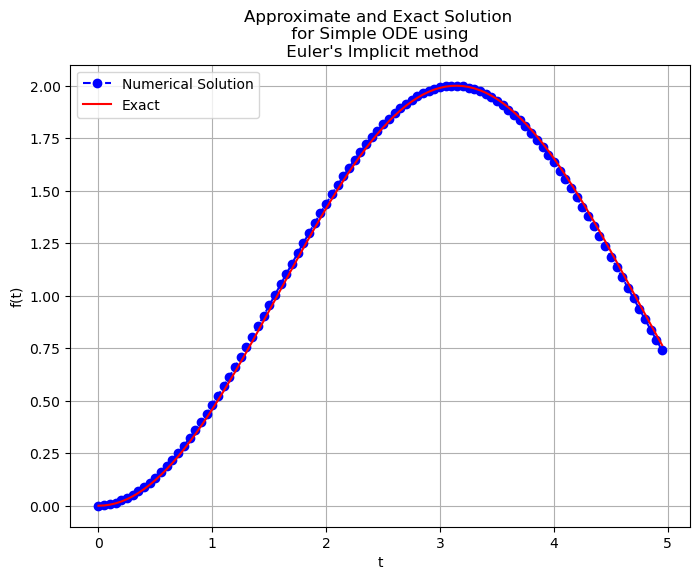

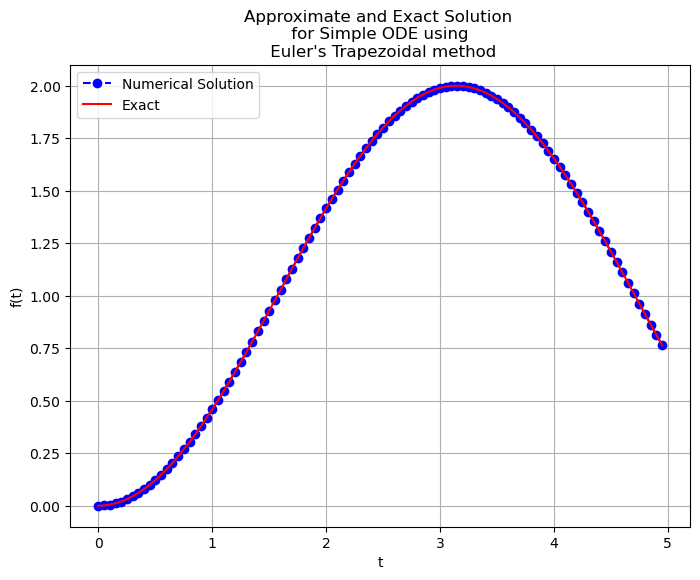

In [32]:
Euler_Method_Checker_Explicit(lambda t : np.sin(t),lambda t : -np.cos(t)+1,0,5,0.05,0)
Euler_Method_Checker_Implicit(lambda t : np.sin(t),lambda t : -np.cos(t)+1,0,5,0.05,0)
Euler_Method_Checker_Trap(lambda t : np.sin(t),lambda t : -np.cos(t)+1,0,5,0.05,0)

## The Different Euler Methods

#### Explicit

$\vec{S}(t_{j+1}) \approx \vec{S}(t_{j})+dt*F(\vec{S}(t_j),t_j)$

#### Implicit

$\vec{S}(t_{j+1}) \approx \vec{S}(t_{j})+dt*F(\vec{S}(t_{j+1}),t_{j+1})$

#### Trapezoidal

$\vec{S}(t_{j+1}) \approx \vec{S}(t_{j})+\frac{dt}{2}(F(\vec{S}(t_j),t_j)+F(\vec{S}(t_{j+1}),t_{j+1}))$

(-3.0, 3.0)

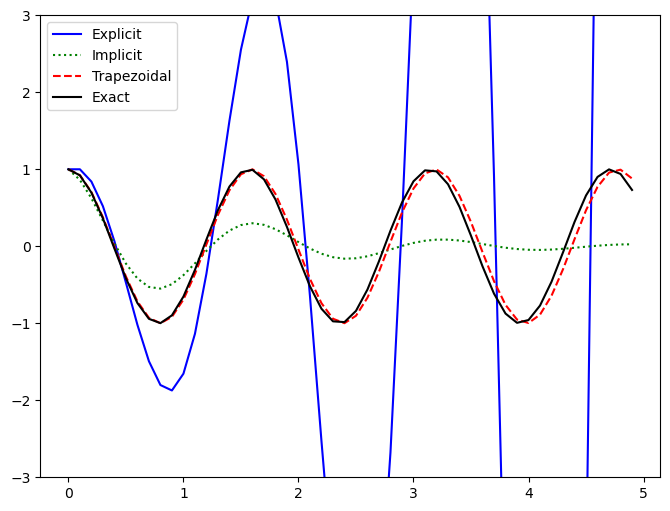

In [7]:
import numpy as np
import matplotlib.pyplot as plt

ti = 0
tf = 5
dt = 0.1

t = np.arange(ti,tf,dt)

w = 4

s0 = np.array([1,0]) #initial condition

me = np.array([[1,dt],[-w**2*dt,1]])
mi = np.linalg.inv([[1,-dt],[w**2*dt,1]])
mt = np.dot(np.linalg.inv(np.array([[1,-dt/2],[w**2*dt/2,1]])),np.array([[1,dt/2],[-w**2*dt/2,1]]))
#mt = np.dot(np.linalg.inv(np.array([[1,-dt/2],[w**2*dt/2,1]])),np.array([[1,dt/2],[-w**2*dt/2,1]]))


se = np.zeros((len(t),2))
si = np.zeros((len(t),2))
st = np.zeros((len(t),2))

se[0,:] = s0
si[0,:] = s0
st[0,:] = s0

for j in range(0,len(t)-1,1):
    se[j+1,:] = np.dot(me,se[j,:])
    si[j+1,:] = np.dot(mi,si[j,:])
    st[j+1,:] = np.dot(mt,st[j,:])
    
fig=plt.figure(figsize=(8,6))
plt.plot(t,se[:,0],'b',label='Explicit')
plt.plot(t,si[:,0],'g:',label='Implicit')
plt.plot(t,st[:,0],'r--',label='Trapezoidal')
plt.plot(t,np.cos(w*t),'k',label='Exact')
plt.legend()
plt.ylim([-3,3])

In [ ]:
#Runge Kutta



# Summary


1. Ordinary differential equations (ODEs) are equations that relate a function to its derivatives, and initial value problems are a specific kind of ODE solving problem.
2. Most initial value problems cannot be integrated explicitly and therefore require numerical solutions.
3. There are explicit, implicit, and predictor-corrector methods for numerically solving initial value problems.
4. The accuracy of the scheme used depends on its order of approximation of the ODE.
5. The stability of the scheme used depends on the ODE, the scheme, and the choice of the integration parameters.

# Problems

1. The logistics equation is a simple differential equation model that can be used to relate the change in population $\frac{dP}{dt}$ to the current population, $P$, given a growth rate, $r$, and a carrying capacity, $K$. The logistics equation can be expressed by:

 $$
\frac{dP}{dt}=rP\left(1-\frac{P}{K}\right)
$$

 Write a function $my\_logistics\_eq(t, P, r, K)$ that represents the logistics equation with a return of $dP$. Note that this format allows $my\_logistics\_eq$ to be used as an input argument to *solve_ivp*. You may assume that the arguments $dP$, $t$, $P$, $r$, and $K$ are all scalars, and $dP$ is the value $\frac{dP}{dt}$ given $r$, $P$, and $K$. Note that the input argument, $t$, is obligatory if $my\_logistics\_eq$ is to be used as an input argument to *solve_ivp*, even though it is part of the differential equation.

 Note: The logistics equation has an analytic solution defined by:
 
 $$
P(t)=\frac{KP_0e^{rt}}{K + P_0(e^{rt}-1)}
$$

 where $P_0$ is the initial population. As an exercise, you should verify that this equation is a solution to the logistics equation.


 Test cases:

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial

%matplotlib inline

In [14]:
def my_logisitcs_eq(t, P, r, K):
    
    dP = r*P*(1-P/K)
    
    return dP


dP = my_logisitcs_eq(0, 10, 1.1, 15)
dP

3.666666666666667

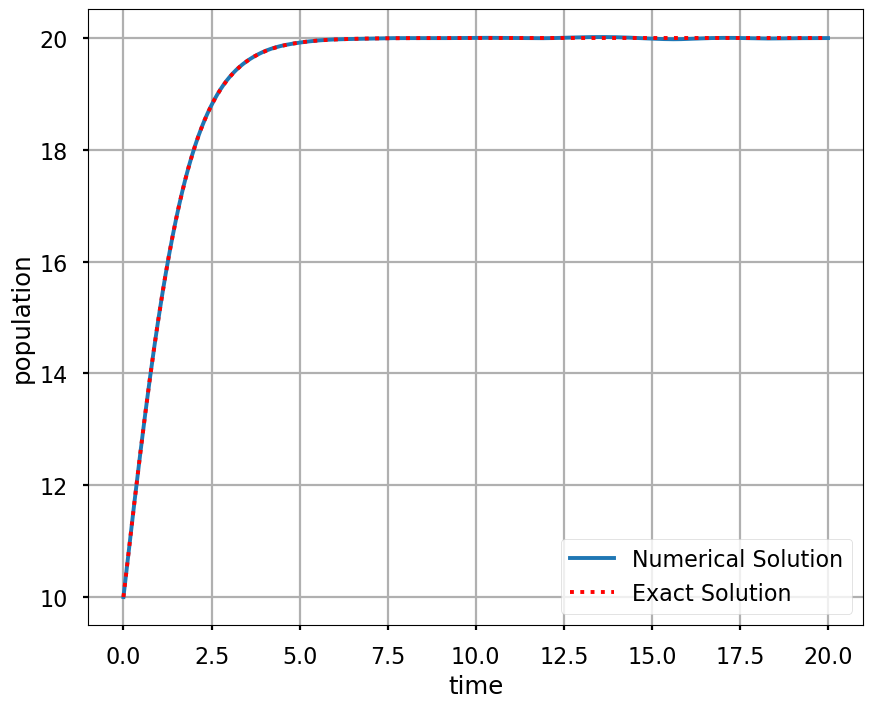

In [15]:
from functools import partial

t0 = 0
tf = 20
P0 = 10
r = 1.1
K = 20
t = np.linspace(0, 20, 2001)

f = partial(my_logisitcs_eq, r=r, K=K)
sol=solve_ivp(f,[t0,tf],[P0],t_eval=t)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(t, \
  K*P0*np.exp(r*t)/(K+P0*(np.exp(r*t)-1)),'r:')
plt.xlabel('time')
plt.ylabel('population')

plt.legend(['Numerical Solution', \
            'Exact Solution'])
plt.grid(True)
plt.show()

2. The Lorenz attractor is a system of ordinary differential equations that was originally developed to model convection currents in the atmosphere. The Lorenz equations can be written as:
 $$
\begin{eqnarray*}
&& \frac{dx}{dt}=\sigma (y-x)\\
&& \frac{dy}{dt} = x(\rho -z)-y\\
&& \frac{dz}{dt} = xy-\beta z
\end{eqnarray*}
$$

 where $x$, $y$, and $z$ represent position in three dimensions and $\sigma, \rho$, and $\beta$ are scalar parameters of the system. You can read more about the Lorenz attractor on Wikipedia: [Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system).

 Write a function $my\_lorenz(t,S,sigma,rho,beta)$, where $t$ is a scalar denoting time, $S$ is a $(3, )$ array denoting the position $(x,y,z)$, and $sigma$, $rho$, and $beta$ are strictly positive scalars representing $\sigma, \rho$, and $\beta$. The output argument $dS$ should be the same size as $S$.
 
 Test Cases:

In [20]:
def my_lorenz(t, S, sigma, rho, beta):
    
    x=S[0]
    y=S[1]
    z=S[2]
    
    dS = np.array([sigma*(y-x), x*(rho-z)-y, x*y-beta*z])
    
    return dS

s = np.array([1, 2, 3])
dS = my_lorenz(0, s, 10, 28, 8/3)
dS

array([10., 23., -6.])

3. Write a function $my\_lorenz\_solver(t\_span, s0, sigma, rho, beta)$ that solves the Lorenz equations using $solve\_ivp$, the function returns [T, X, Y, Z]. The input argument $t\_span$ should be a list of the form $[t0, tf]$, where $t0$ is the initial time, and $tf$ is the final time of consideration. The input argument $s0$ should be a $(3,)$ array of the form $[x0; y0; z0]$, where $(x_0, y_0, z_0)$ represents an initial position. Finally, the input arguments $sigma$, $rho$, and $beta$ are the scalar parameters $\sigma, \rho$, and $\beta$ of the Lorenz system. The output arguments $T$ should be an array of times given as the output argument of $solve\_ivp$. The output arguments, $X$, $Y$, and $Z$ should be the numerically integrated solution produced from $my\_lorenz$ in the previous problem and $solve\_ivp$. 

 Test Cases:

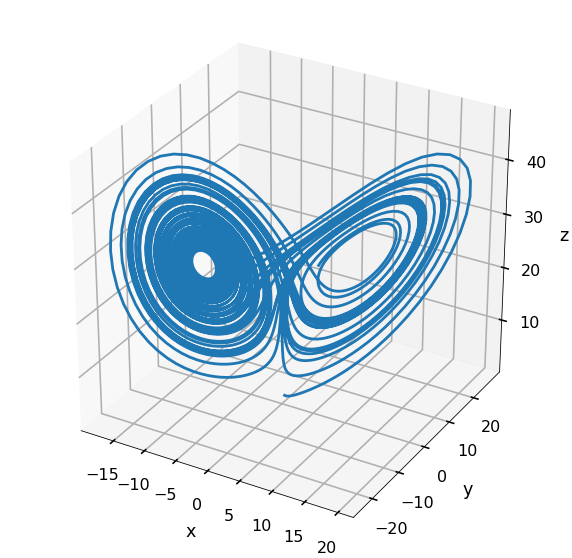

In [5]:
def my_lorenz_solver(t_span, s0, sigma, rho, beta):
    
    T = solve_ivp(np.array([[-sigma,sigma,0],[,,],[]]), [0, 10], [1, 1], t_eval=t_eval)
    
    return [T, X, Y, Z]

sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])

[T, X, Y, Z] = my_lorenz_solver([t0, tf], \
                        s0, sigma, rho, beta)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.plot3D(X, Y, Z)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

4. Consider the following model of a mass-spring-damper (MSD) system in one dimension. In this figure $m$ denotes the mass of the block, $c$ is called the damping coefficient, and $k$ is the spring stiffness. A damper is a mechanism that dissipates energy in the system by resisting velocity. The MSD system is a simplistic model of several engineering applications such as shock observers and structural systems.

 <img src="images/22.07.01-msd.png" alt="msd" title="mass-spring-damper system." width="200"/>

 The relationship between acceleration, velocity, and displacement can be expressed by the following mass-spring-damper (MSD) differential equation:

 $$
m\ddot{x} + c\dot{x} +kx = 0
$$
 which can be rewritten:
 $$
\ddot{x}=\frac{-(c\dot{x}+kx)}{m}
$$

 Let the state of the system be denoted by the vector $S = [x; v]$ where $x$ is the displacement of the mass from its resting configuration and $v$ is its velocity. Rewrite the MSD equation as a first-order differential equation in terms of the state, $S$. In other words, rewrite the MSD equation as $dS/dt = f(t, S)$.

 Write a function $my\_msd(t, S, m, c, k)$, where $t$ is a scalar denoting time, $S$ is a $(2,)$ vector denoting the state of the MSD system, and $m$, $c$, and $k$ are the mass, damping, and stiffness coefficients of the MSD equation, respectively.
 
 Test Cases:

In [6]:
def my_msd(t, S, m, c, k):
    # put your code here
    return ds

my_msd(0, [1, -1], 10, 1, 100)

array([-1. , -9.9])

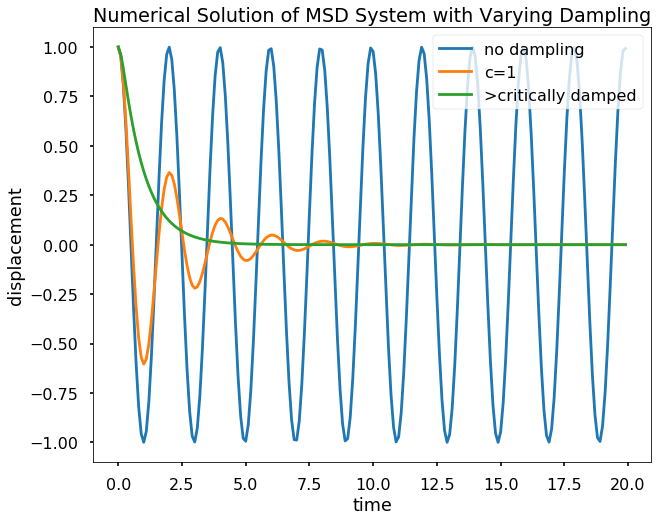

In [7]:
m = 1
k = 10
f = partial(my_msd, m=m, c=0, k=k)
t_e = np.arange(0, 20, 0.1)
sol_1=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=1, k=k)
sol_2=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=10, k=k)
sol_3=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

plt.figure(figsize = (10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title('Numerical Solution of MSD \
System with Varying Dampling')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend(['no dampling', 'c=1', \
           '>critically damped'], loc=1)

5. Write a function $my\_forward\_euler(ds, t\_span, s0)$, where *ds* is a function object, $f(t, s)$, describing a first-order differential equation, $t\_span$ is an array of times for which numerical solutions of the differential equation are desired, and *s0* is the initial condition of the system. Assume that the size of the state is one. The output argument should be a list of [t, s], such that $t[i] = t\_span[i]$ for all $i$, and $s$ should be the integrated values of *ds* at times *t*. You should perform the integration using the Forward Euler method, $s[t_i] = s[t_{i-1}] + (t_i - t_{i-1}) ds(t_{i-1}, s[t_{i-1}])$. Note: $s[0]$ should equal $s0$.

 Test Cases:

In [8]:
def my_forward_euler(ds, t_span, s0):
    # put your code here
    
    return [t, s]

t_span = np.linspace(0, 1, 10)
s0 = 1

# Define parameters
f = lambda t, s: t*np.exp(-s)

t_eul, s_eul = my_forward_euler(f, t_span, s0)

print(t_eul)
print(s_eul)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[1.         1.         1.00454172 1.013584   1.02702534 1.04470783
 1.06642355 1.09192262 1.12092255 1.153118  ]


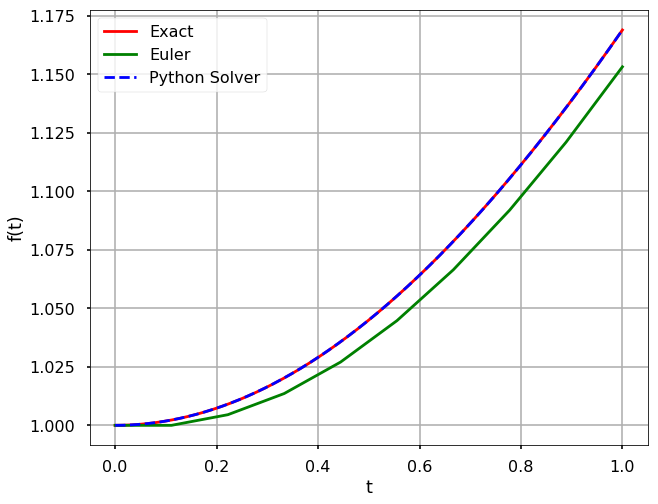

In [9]:
plt.figure(figsize = (10, 8))

# Exact solution
t = np.linspace(0, 1, 1000)
s = np.log(np.exp(s0) + (t**2-t[0])/2)
plt.plot(t, s, 'r', label='Exact')

# Forward Euler
plt.plot(t_eul, s_eul, 'g', label='Euler')

# Python solver
sol = solve_ivp(f, [0, 1], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], 'b--', \
         label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()

6. Write a function $myRK4(ds, t_span, s0)$, where the input and output arguments are the same as in problem 5. The function $myRK4$ should numerically integrate *ds* using the fourth-order Runge-Kutta method.

 Test Cases:

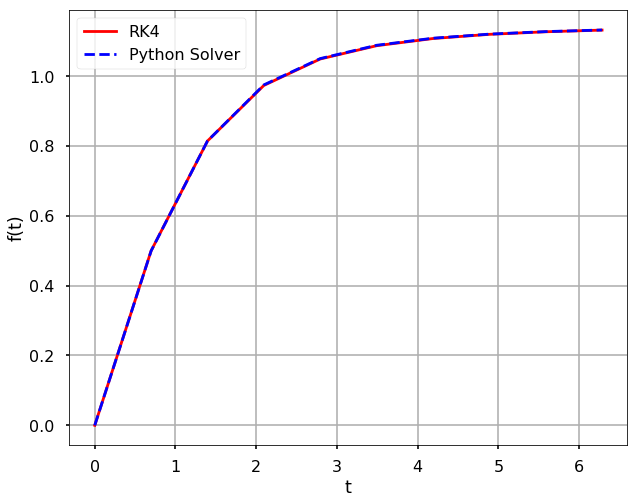

In [10]:
def myRK4(ds, t_span, s0):
    # put your code here
    
    return [t, s]

f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 = 0

plt.figure(figsize = (10, 8))

# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, 'r', label='RK4')

# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], \
         'b--', label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()

<!--NAVIGATION-->
< [22.7 Advanced-Topics](chapter22.07-Advanced-Topics.ipynb) | [Contents](Index.ipynb) | [CHAPTER 23. Ordinary Differential Equations: Boundary-Value Problems](chapter23.00-ODE-Boundary-Value-Problems.ipynb) >